Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes.I used a Support Vector Machines classifier to classify a Pulsar star. I have used the Predicting a Pulsar Star dataset for this exercise from kaggle.

TABLE OF CONTENTS:
    
1.Dataset description
2.Import libraries
3.Import dataset
4.Exploratory data analysis
5.Declare feature vector and target variable
6.Split data into separate training and test set
7.Feature scaling
8.SVM with default hyperparameters
9.SVM with linear kernel
10.SVM with polynomial kernel
11.SVM with sigmoid kernel
12.Confusion matrix
13.Classification metrices
14.ROC - AUC
15.Results and conclusion

# 1.Dataset description


The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Attribute Information:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

Mean of the integrated profile.

Standard deviation of the integrated profile.

Excess kurtosis of the integrated profile.

Skewness of the integrated profile.

Mean of the DM-SNR curve.

Standard deviation of the DM-SNR curve.

Excess kurtosis of the DM-SNR curve.

Skewness of the DM-SNR curve.

Class

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/Pulsar.csv')

In [4]:
df.shape

(17898, 9)

We can see that there are 17898 instances and 9 variables in the data set.

In [5]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is target_class variable. It is the target variable.

In [6]:
col_names = df.columns

col_names

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

In [8]:
# check distribution of target_class column

df['Class'].value_counts()

0    16259
1     1639
Name: Class, dtype: int64

In [9]:
# view the percentage distribution of target_class column

df['Class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: Class, dtype: float64

We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem.

In [10]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [11]:
# check for missing values in variables

df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

We can see that there are no missing values in the dataset and all the variables are numerical variables.

Summary of numerical variables:

There are 9 numerical variables in the dataset.
8 are continuous variables and 1 is discrete variable.
The discrete variable is target_class variable. It is also the target variable.
There are no missing values in the dataset.

In [12]:
# Outliers
# view summary statistics in numerical variables

round(df.describe(),2)

#On closer inspection, we can suspect that all the continuous variables may contain outliers.

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'Skewness_DMSNR_Curve')

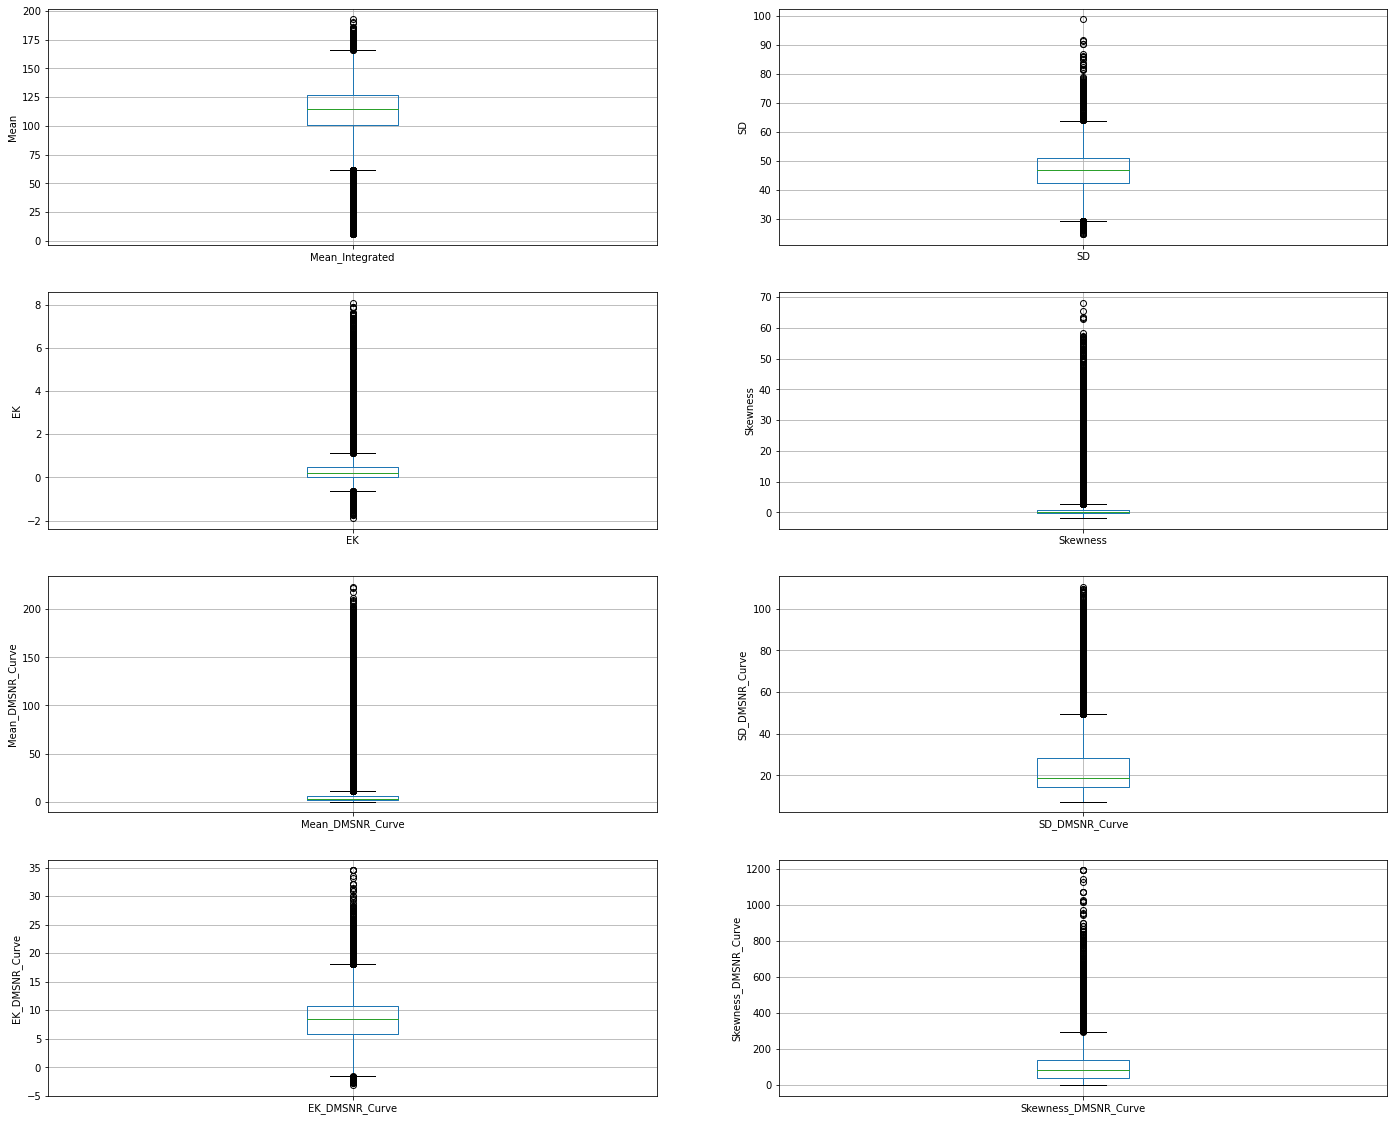

In [13]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Mean_Integrated')
fig.set_title('')
fig.set_ylabel('Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='SD')
fig.set_title('')
fig.set_ylabel('SD')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='EK')
fig.set_title('')
fig.set_ylabel('EK')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Skewness')
fig.set_title('')
fig.set_ylabel('Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Mean_DMSNR_Curve')
fig.set_title('')
fig.set_ylabel('Mean_DMSNR_Curve')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='SD_DMSNR_Curve')
fig.set_title('')
fig.set_ylabel('SD_DMSNR_Curve')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='EK_DMSNR_Curve')
fig.set_title('')
fig.set_ylabel('EK_DMSNR_Curve')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='Skewness_DMSNR_Curve')
fig.set_title('')
fig.set_ylabel('Skewness_DMSNR_Curve')

The above boxplots confirm that there are lot of outliers in these variables.

Text(0, 0.5, 'Number of pulsar stars')

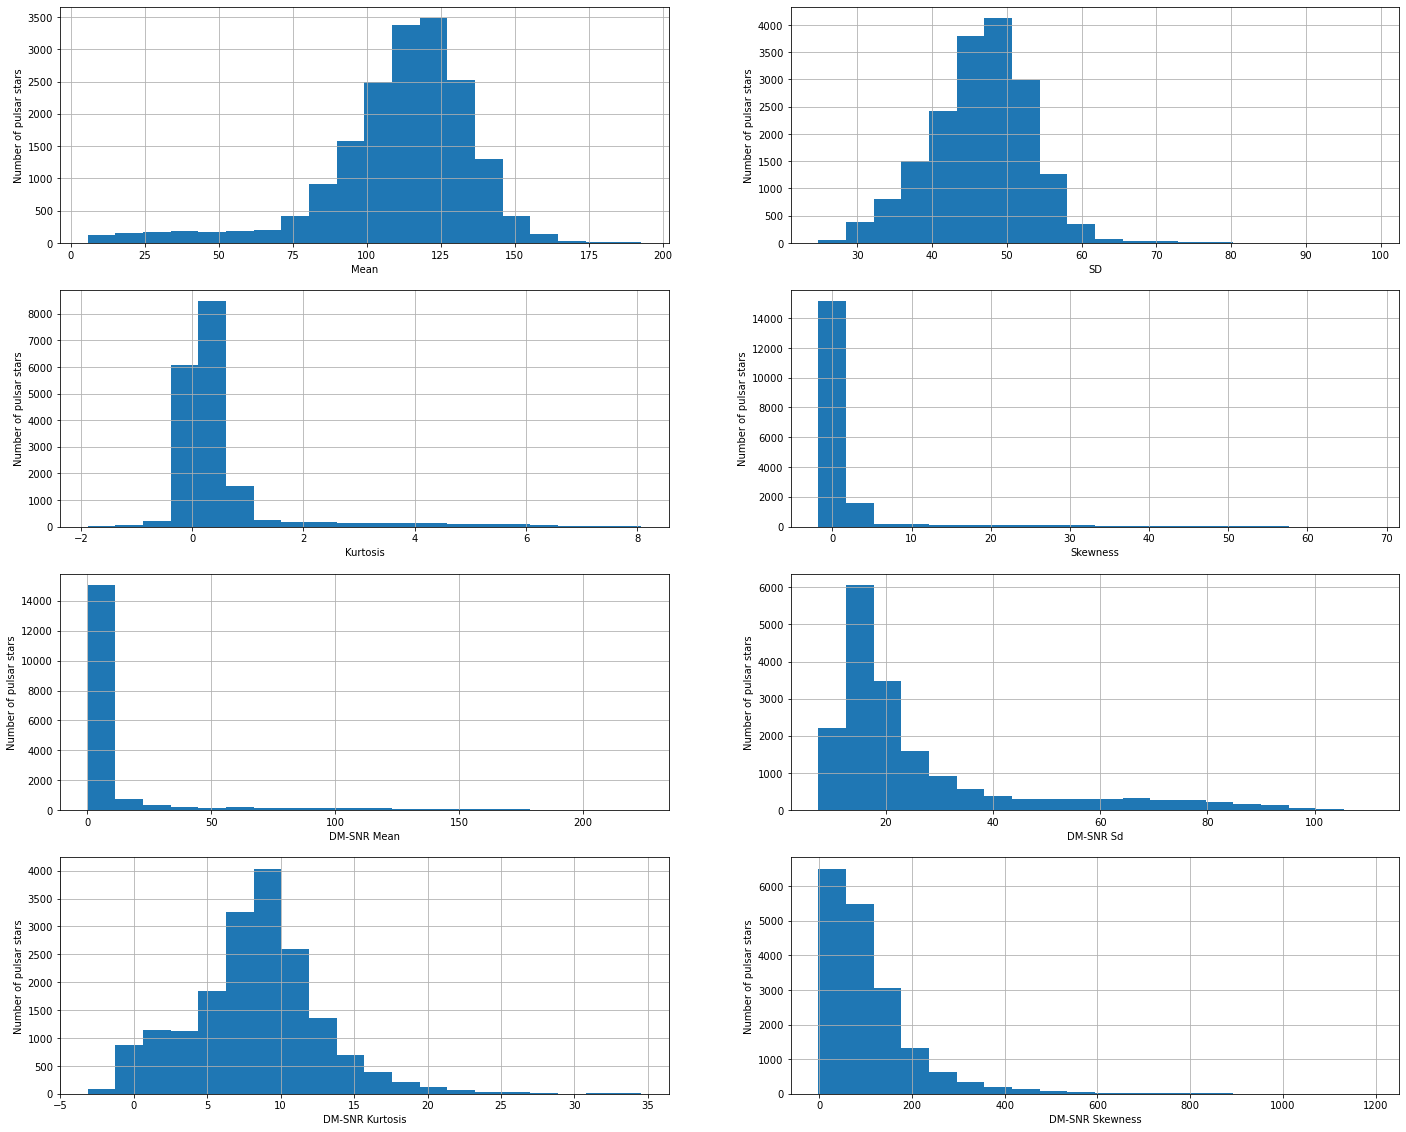

In [14]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Mean_Integrated'].hist(bins=20)
fig.set_xlabel('Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['SD'].hist(bins=20)
fig.set_xlabel('SD')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['EK'].hist(bins=20)
fig.set_xlabel('Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['Skewness'].hist(bins=20)
fig.set_xlabel('Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['Mean_DMSNR_Curve'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['SD_DMSNR_Curve'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['EK_DMSNR_Curve'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['Skewness_DMSNR_Curve'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

All the variables are skewed

# Feature vector and target variable

In [15]:
X = df.drop(['Class'], axis=1)

y = df['Class']

# Train, Test Split

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# Feature Scaling

In [18]:
cols = X_train.columns

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [21]:
X_train.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.735622e-16,1.792879e-17,3.631409e-17,-8.459267e-17,-1.563912e-16,-1.277090e-17,1.172992e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


We now have X_train dataset ready to be fed into the SVM classifier.

# SVM with default parameters

In [25]:
# Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc1=SVC() 

In [29]:
# fit classifier to training set
svc1.fit(X_train,y_train)
# make predictions on test set
y_pred=svc1.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [30]:
#Run SVM with rbf kernel and C=100.0

# instantiate classifier with rbf kernel and C=100
svc2=SVC(C=100.0) 
# fit classifier to training set
svc2.fit(X_train,y_train)
# make predictions on test set
y_pred=svc2.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

In [31]:
# instantiate classifier with rbf kernel and C=1000
svc3=SVC(C=1000.0) 
# fit classifier to training set
svc3.fit(X_train,y_train)
# make predictions on test set
y_pred=svc3.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In this case, we can see that the accuracy had decreased with C=1000.0

# SVM with Linear kernel

In [33]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


In [34]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

linear_svc100.fit(X_train, y_train)

y_pred=linear_svc100.predict(X_test)

print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [35]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

linear_svc1000.fit(X_train, y_train)

y_pred=linear_svc1000.predict(X_test)

print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [ ]:
#Compare the train-set and test-set accuracy
#Now,compare the train-set and test-set accuracy to check for overfitting.

In [36]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


We can see that the training set and test-set accuracy are very much comparable.

In [38]:
# Check for overfitting

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.

Comparing with null accuracy

We must compare the test accuracy with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [39]:
# check class distribution in test set

y_test.value_counts()

0    3306
1     274
Name: Class, dtype: int64

We can see that the occurences of most frequent class 0 is 3306. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

In [40]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


We can see that our model accuracy score is 0.9830 but null accuracy score is 0.9235. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

# SVM with polynomial kernel

In [41]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc1=SVC(kernel='poly', C=1.0) 

poly_svc1.fit(X_train,y_train)

y_pred=poly_svc1.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [42]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

poly_svc100.fit(X_train, y_train)

y_pred=poly_svc100.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


Polynomial kernel gives a slight poor performance. It may be overfitting the training set.

# SVM with sigmoid kernal

In [43]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

sigmoid_svc.fit(X_train,y_train)

y_pred=sigmoid_svc.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [44]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

sigmoid_svc100.fit(X_train,y_train)

y_pred=sigmoid_svc100.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

INFERENCE:
    We get maximum accuracy with rbf and linear kernel with C=100.0. and the accuracy is 0.9832. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

# Confusion matrix

In [45]:
# Print the Confusion Matrix and slice it into four pieces(svm_linear_kernal)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


The confusion matrix shows 3289 + 230 = 3519 correct predictions and 17 + 44 = 61 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 3289
True Negatives (Actual Negative:0 and Predict Negative:0) - 230
False Positives (Actual Negative:0 but Predict Positive:1) - 17 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 44 (Type II error)

<AxesSubplot:>

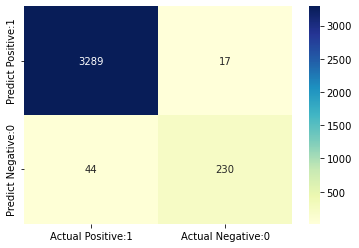

In [46]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [49]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [50]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9830


In [51]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0170


In [52]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9949


In [53]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868


# ROC and AUC

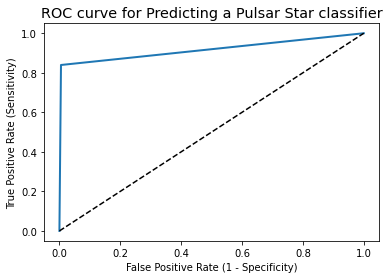

In [54]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

In [55]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


Inferences

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

CONCLUSION

=>There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

=>We get maximum accuracy with rbf and linear kernel with C=100.0 and the accuracy is 0.9832. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore confusion matrix that provide better guidance in selecting models.

=>ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

